In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('../../Data/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

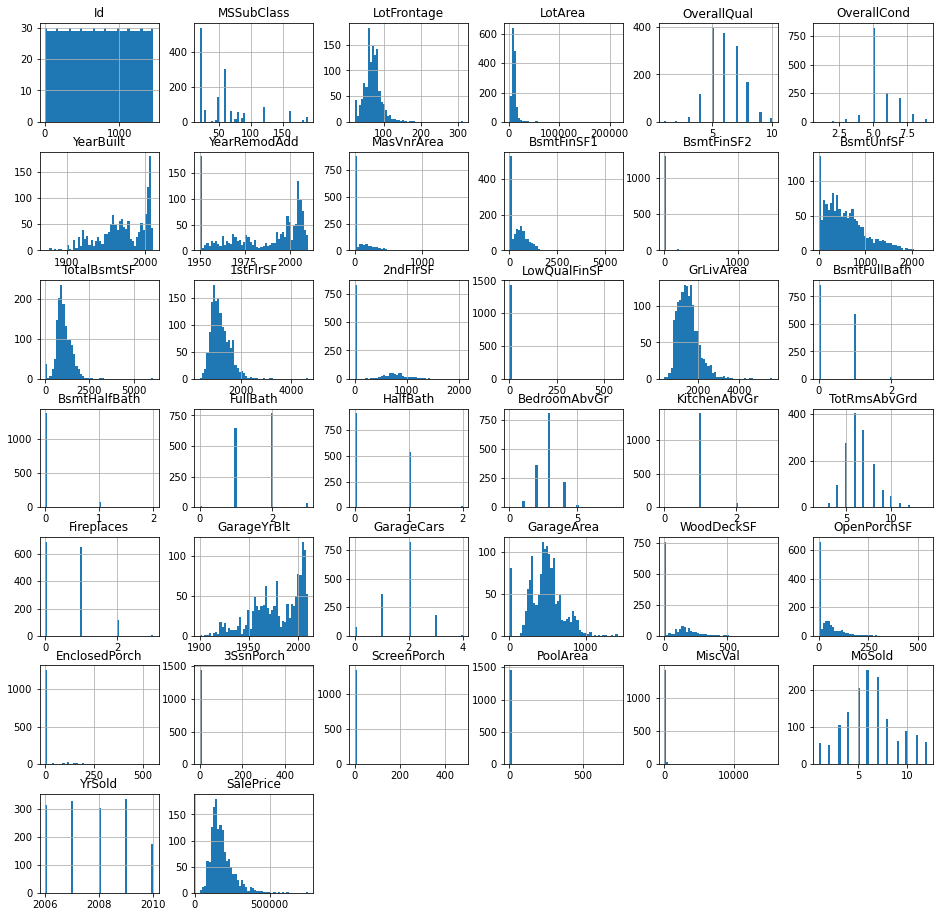

In [7]:
_ = df.hist(bins=50, figsize=(16,16))

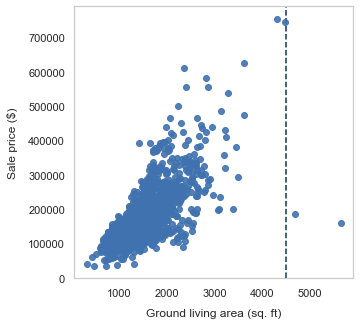

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.grid()
ax.scatter(df["GrLivArea"], df["SalePrice"], c="#3f72af", zorder=3, alpha=0.9)
ax.axvline(4500, c="#112d4e", ls="--", zorder=2)
ax.set_xlabel("Ground living area (sq. ft)", labelpad=10)
ax.set_ylabel("Sale price ($)", labelpad=10)
plt.show()

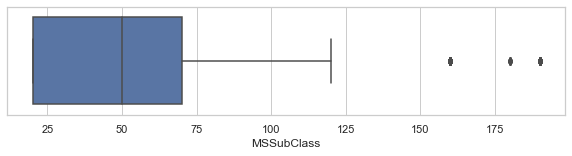

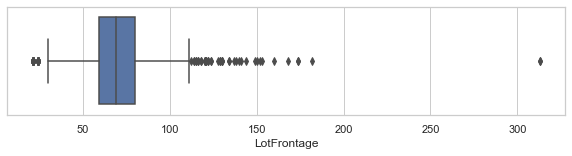

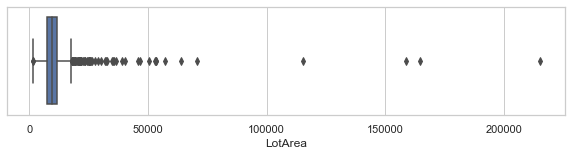

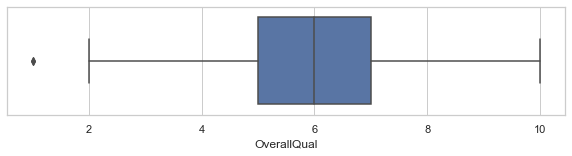

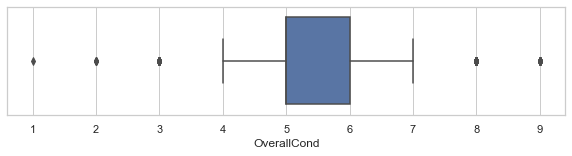

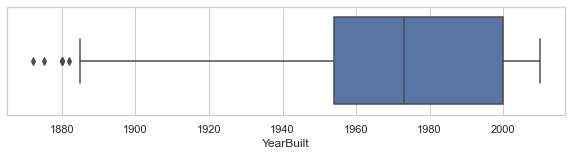

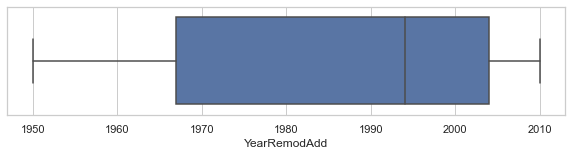

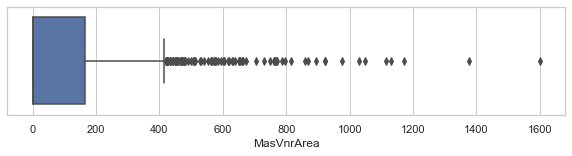

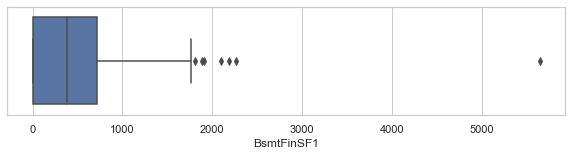

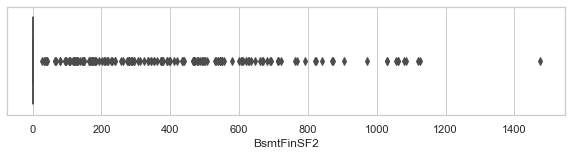

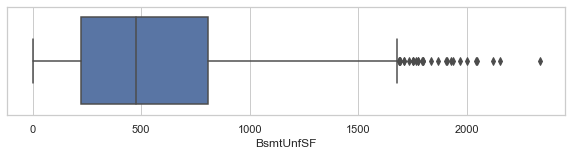

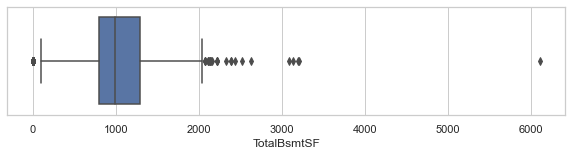

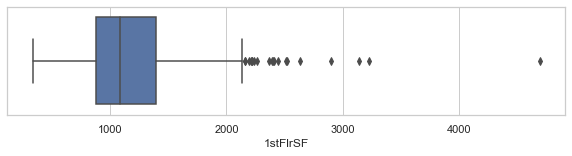

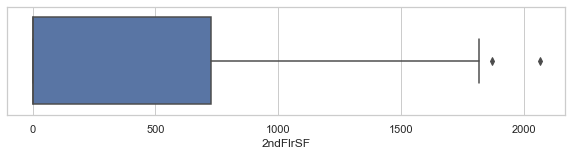

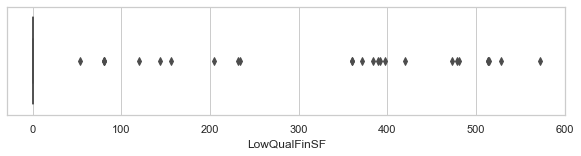

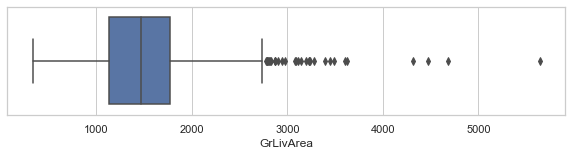

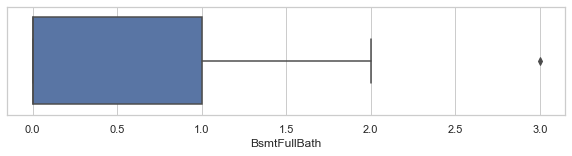

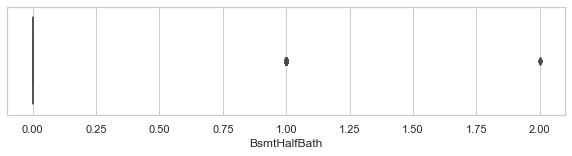

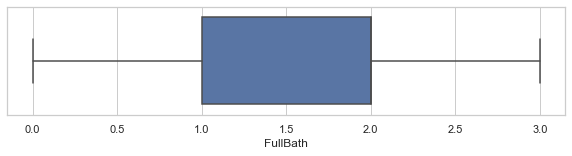

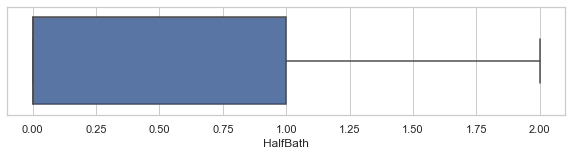

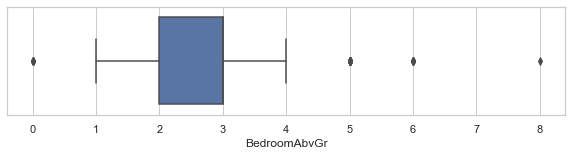

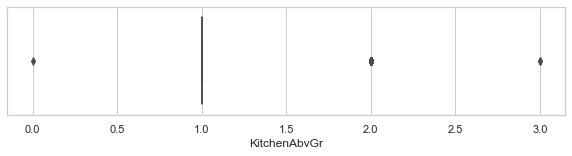

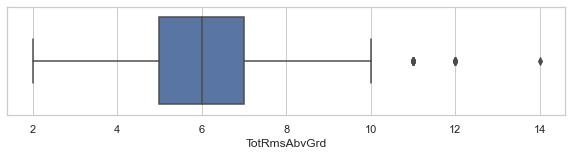

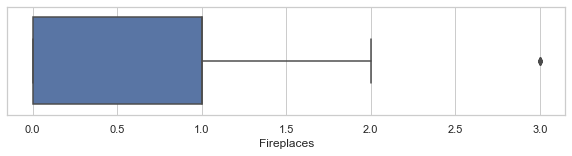

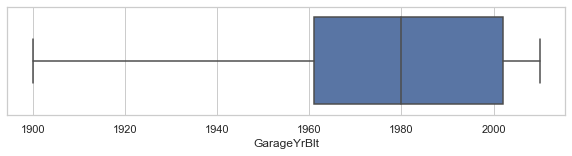

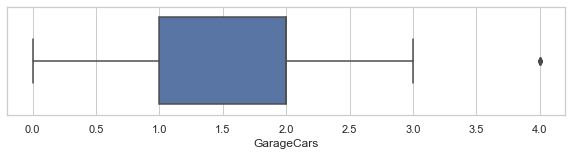

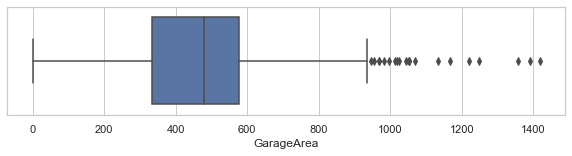

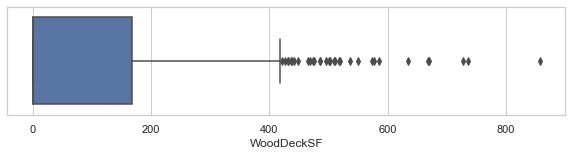

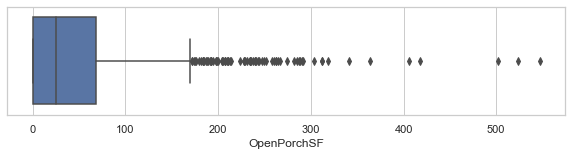

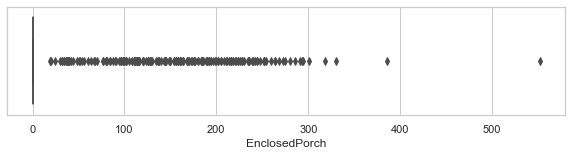

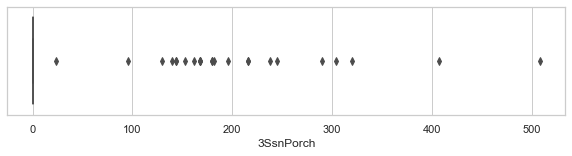

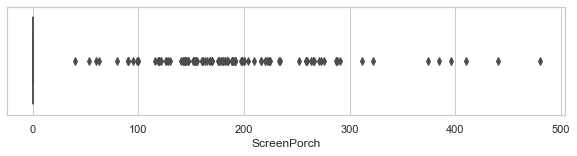

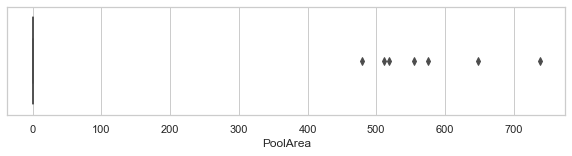

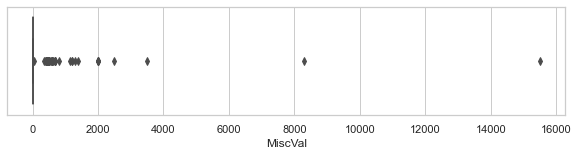

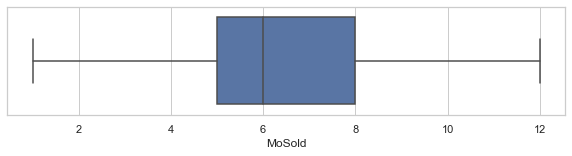

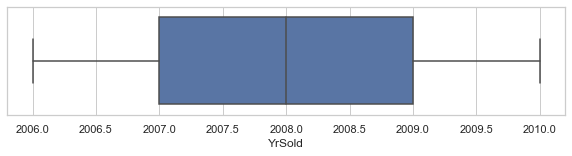

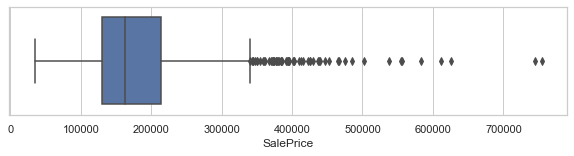

In [24]:
plt.rcParams.update({'figure.max_open_warning': 0})
# find outliers for all the numerical dataset
numerical_df = df.select_dtypes(exclude=['object'])
numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(10, 2))
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=numerical_df[column])

In [14]:
df.get("SalePrice").describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

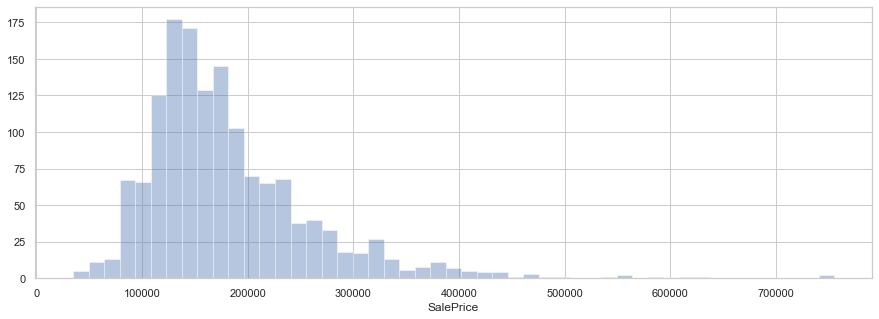

In [17]:
f, ax = plt.subplots(figsize=(15,5))
sns.distplot(df.get("SalePrice"), kde=False)
plt.show()

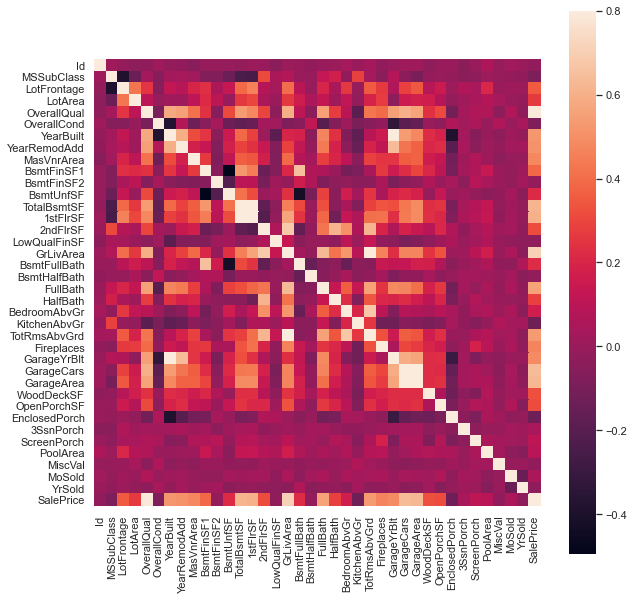

In [30]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

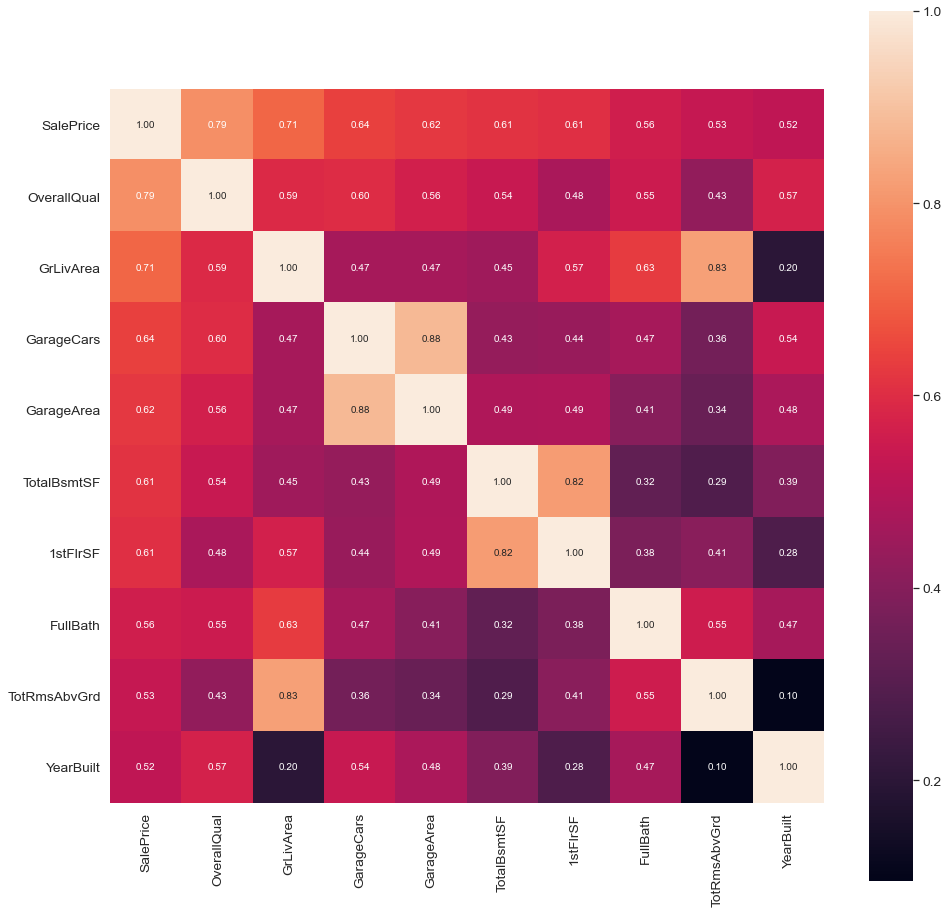

In [31]:
plt.figure(figsize=(16,16))
columns = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
correlation_matrix = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [33]:
total = df.isna().sum().sort_values(ascending=False)
# concatenate this data into dataframe
missing_data = pd.concat([total], axis=1, keys=["Total"])
missing_data.head(45)

,Total
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


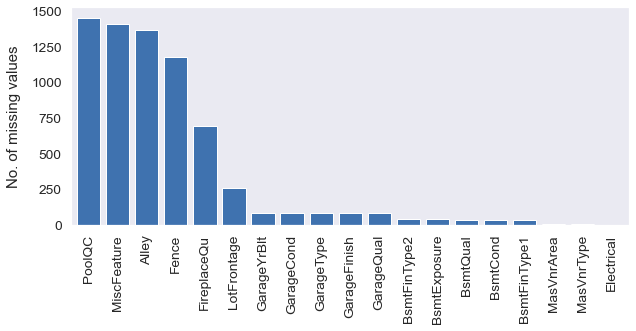

In [37]:
total = total[total > 0]
fig, ax = plt.subplots(figsize=(10, 4))
ax.grid()
ax.bar(total.index, total.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(total) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [39]:
df = df.drop(missing_data[missing_data.Total > 0 ].index, axis=1)

In [40]:
df = pd.get_dummies(df)

In [41]:
df.shape

(1460, 217)

In [43]:
X = df.drop(labels=['SalePrice'], axis=1)

In [44]:
y = df['SalePrice']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [46]:
X.isna().sum().sort_values(ascending=False)

Id                       0
Exterior2nd_CmentBd      0
Exterior1st_Plywood      0
Exterior1st_Stone        0
Exterior1st_Stucco       0
                        ..
Neighborhood_NridgHt     0
Neighborhood_OldTown     0
Neighborhood_SWISU       0
Neighborhood_Sawyer      0
SaleCondition_Partial    0
Length: 216, dtype: int64

## Model

In [47]:
import xgboost as xgb

In [49]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [51]:
y_train_pred = xgb_reg.predict(X_train)
y_val_pred = xgb_reg.predict(X_val)

In [52]:
from sklearn import metrics

In [54]:
np.sqrt(metrics.mean_squared_error(y_true=y_train, y_pred=y_train_pred))

1218.4148459822745

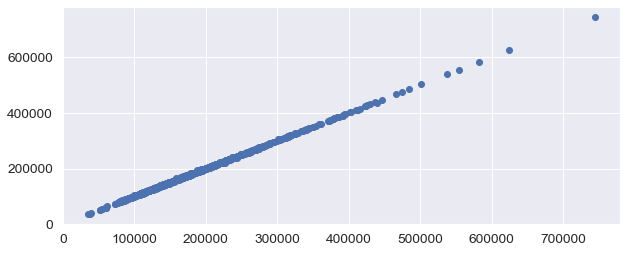

In [63]:
plt.figure(figsize=(10,4))
plt.scatter(x=y_train, y=y_train_pred)

In [56]:
np.sqrt(metrics.mean_squared_error(y_true=y_val, y_pred=y_val_pred))

30472.324544202515

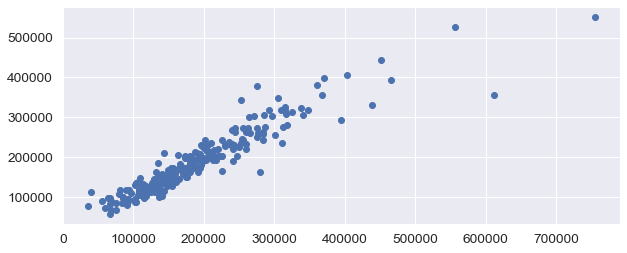

In [64]:
plt.figure(figsize=(10,4))
plt.scatter(x=y_val, y=y_val_pred)

## Optuna for Hyperparameters Optimization

In [65]:
import optuna

In [81]:
def objective(trial):
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_val, label=y_val_pred)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
        
    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    
    rmse = np.sqrt(metrics.mean_squared_error(y_true=y_val, y_pred=preds))
#     rmse = np.sqrt(metrics.mean_squared_error(y_true=y_train, y_pred=bst.predict(dtrain)))
    
    return rmse

In [82]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2022-04-22 23:26:29,745] A new study created in memory with name: no-name-5ad1ce35-9c14-439a-9ddb-230d23b3f16f
[I 2022-04-22 23:26:29,841] Trial 0 finished with value: 29619.005676513607 and parameters: {'booster': 'dart', 'lambda': 0.017628570192704834, 'alpha': 1.344380206620904e-05, 'subsample': 0.6906827308948904, 'colsample_bytree': 0.7530242308999437, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.358607002545771, 'gamma': 6.002010932030952e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.3442789848211043e-08, 'skip_drop': 1.775497867323423e-05}. Best is trial 0 with value: 29619.005676513607.
[I 2022-04-22 23:26:29,883] Trial 1 finished with value: 199132.21820831 and parameters: {'booster': 'gbtree', 'lambda': 0.05616706527419005, 'alpha': 0.00013584269869505302, 'subsample': 0.8121337013941601, 'colsample_bytree': 0.6318814435889683, 'max_depth': 9, 'min_child_weight': 6, 'eta': 2.456494992996257e-07, 'gamma': 0.00298546

In [83]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value: 29619.005676513607
  Params: 
    booster: dart
    lambda: 0.017628570192704834
    alpha: 1.344380206620904e-05
    subsample: 0.6906827308948904
    colsample_bytree: 0.7530242308999437
    max_depth: 9
    min_child_weight: 3
    eta: 0.358607002545771
    gamma: 6.002010932030952e-08
    grow_policy: depthwise
    sample_type: uniform
    normalize_type: forest
    rate_drop: 2.3442789848211043e-08
    skip_drop: 1.775497867323423e-05
